# Supervised learning Model

## Preparing Data

In [1]:
#! pip install pyreadstat
import pandas as pd
import pyreadstat
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# start again

In [2]:
import pyreadstat

clinical_df, meta = pyreadstat.read_sav("../raw_data/FIRE3_Heike_set_new.sav")

In [3]:
new_df= pd.read_csv("../raw_data/cetux.csv")
new_df.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,sex,age,skin_rash
0,9,0.067346,0.000000,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.071104,0.000000,0.0,0.188876,0.000000,0.074924,0.004,1.0,61.0,1.0
1,10,0.000000,0.000000,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.000000,0.009239,0.0,0.134230,0.000000,0.070198,0.024,1.0,74.0,1.0
2,12,0.065798,0.000000,0.118399,0.111458,0.0,0.281396,0.000000,0.000000,0.069544,...,0.024802,0.000000,0.0,0.086495,0.032828,0.051155,0.002,1.0,73.0,1.0
3,15,0.010223,0.000000,0.186072,0.193724,0.0,0.283032,0.000000,0.000000,0.144012,...,0.000000,0.000000,0.0,0.081489,0.000000,0.004522,0.034,1.0,68.0,1.0
4,16,0.000000,0.013582,0.056297,0.080645,0.0,0.336947,0.000000,0.035983,0.057663,...,0.079572,0.010232,0.0,0.045427,0.000000,0.095906,0.022,1.0,42.0,1.0


In [4]:
X=new_df.drop(columns=["pat_nr","P-value","sex","age","skin_rash"])
y=new_df["skin_rash"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    random_state = 6) # Holdout

In [6]:
X_spe=new_df[["Plasma cells","Neutrophils","Macrophages M0","Macrophages M1","Mast cells resting","Macrophages M2"]]

In [7]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_spe, y,
                                                    test_size = 0.25) # Holdout

In [8]:
X_study=new_df[["Macrophages M1","Macrophages M2","Neutrophils","Eosinophils"]]

In [70]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_study, y,
                                                    test_size = 0.25) # Holdout
#X_train3.head()

In [64]:
cetux_new_p = new_df[new_df['P-value'] <= 0.05]
y4 = cetux_new_p["skin_rash"]
X4=cetux_new_p.drop(columns=["pat_nr","P-value","sex","age","skin_rash"])

In [11]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4,
                                                    test_size = 0.25)

In [12]:
X5=new_df[["Dendritic cells activated",
           "Dendritic cells resting",
           "T cells CD4 memory activated",
           "T cells CD4 memory resting",
           "T cells follicular helper",
           "T cells CD4 naive",
           "T cells gamma delta",
           "T cells regulatory (Tregs)",
           "T cells CD8"]]

In [13]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y,
                                                    test_size = 0.25) # Holdout
#X_train3.head()

In [14]:
X_study2=new_df[["Macrophages M1","Macrophages M2","Neutrophils","Eosinophils","sex"]]

In [15]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_study2, y,
                                                    test_size = 0.25)

In [16]:
X_study3=new_df.merge(clinical_df, on="pat_nr")
X_study3[["os_time_mo"]]

,os_time_mo
0,29.798768
1,44.386037
2,7.063655
3,13.634497
4,23.753593
...,...
213,54.176591
214,33.215606
215,35.154004
216,4.829569


## Some Data Analysis

In [48]:
analysis = new_df.iloc[:,1:27]
analysis.isin([0.0000]).sum(axis=0)

B cells naive                    45
B cells memory                  181
Plasma cells                      2
T cells CD8                       2
T cells CD4 naive               216
T cells CD4 memory resting        1
T cells CD4 memory activated    152
T cells follicular helper        72
T cells regulatory (Tregs)       26
T cells gamma delta             215
NK cells resting                 50
NK cells activated              159
Monocytes                        77
Macrophages M0                  111
Macrophages M1                   50
Macrophages M2                    4
Dendritic cells resting          99
Dendritic cells activated       157
Mast cells resting              125
Mast cells activated             33
Eosinophils                     215
Neutrophils                       9
P-value                          16
sex                               0
age                               0
skin_rash                       109
dtype: int64

In [49]:
analysis=analysis.drop(columns=["B cells memory","T cells CD4 naive",
                                "T cells CD4 memory activated","T cells gamma delta",
                                "NK cells activated","Dendritic cells activated",
                                "Macrophages M0","Mast cells resting",
                                "P-value","sex","age",
                                "Eosinophils","Dendritic cells resting"])

In [50]:
y7 = analysis["skin_rash"]
X7=analysis.drop(columns=["skin_rash"])

In [51]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7,
                                                    test_size = 0.25)

## Logistic Regression

In [52]:
model_log = LogisticRegression(class_weight='balanced')
model_log=model_log.fit(X_train,y_train)

cv_results = cross_validate(model_log, X_train, y_train, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.49053030303030304

In [53]:
model_log=model_log.fit(X_train2,y_train2)
cv_results = cross_validate(model_log, X_train2, y_train2, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.6193181818181819

In [54]:
model_log=model_log.fit(X_train3,y_train3)
cv_results = cross_validate(model_log, X_train3, y_train3, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5765151515151515

In [55]:
model_log=model_log.fit(X_train4,y_train4)
cv_results = cross_validate(model_log, X_train4, y_train4, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5489999999999999

In [56]:
model_log=model_log.fit(X_train5,y_train5)
cv_results = cross_validate(model_log, X_train5, y_train5, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.540340909090909

In [39]:
model_log=model_log.fit(X_train6,y_train6)
cv_results = cross_validate(model_log, X_train6, y_train6, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5583333333333333

In [40]:
model_log=model_log.fit(X_train6,y_train6)
cv_results = cross_validate(model_log, X_train7, y_train7, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5575757575757576

In [41]:
k_grid={"solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],"penalty": ["none", "l1", "l2", "elasticnet"],"C":[100, 10, 1.0, 0.1, 0.01]}
 
search = GridSearchCV(model_log, k_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 
search.fit(X_train7, y_train7);
search.best_params_

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/leacebull

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: T

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: T

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: T

In [269]:
model_log_best3 = LogisticRegression(class_weight='balanced',C=0.1,penalty="l2",solver="liblinear")
model_log_best3 = model_log_best3.fit(X_train3,y_train)

cv_results = cross_validate(model_log_best3, X_train3, y_train3, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.6441287878787879

In [270]:
model_log_best2 = LogisticRegression(class_weight='balanced',C=0.1,penalty="l2",solver="liblinear")
model_log_best2 = model_log_best2.fit(X_train2,y_train)

cv_results = cross_validate(model_log_best2, X_train2, y_train2, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5960227272727272

In [271]:
model_log_best4 = LogisticRegression(class_weight='balanced',C=0.01,penalty="l2",solver="liblinear")
model_log_best4 = model_log_best4.fit(X_train4,y_train4)

cv_results = cross_validate(model_log_best4, X_train4, y_train4, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5246666666666666

In [273]:
model_log_best5 = LogisticRegression(class_weight='balanced',C=100,penalty="l2",solver="liblinear")
model_log_best5 = model_log_best5.fit(X_train5,y_train5)

cv_results = cross_validate(model_log_best5, X_train5, y_train, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.4979166666666666

In [274]:
model_log_best6 = LogisticRegression(class_weight='balanced',C=0.01,penalty="none",solver="sag")
model_log_best6 = model_log_best6.fit(X_train6,y_train6)

cv_results = cross_validate(model_log_best6, X_train6, y_train6, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Se

0.6015151515151516

### Data Investigation

In [54]:
coef=model_log.coef_[0]
dicc=dict()
for i in range(len(list(X))):
    dicc[list(X)[i]]=coef[i]

dic=dict(sorted(dicc.items(), key=lambda item: item[1]))

In [19]:
data=pd.DataFrame.from_dict(dic,orient='index')
data

,0
Mast cells activated,-0.102239
Dendritic cells resting,-0.097224
Macrophages M2,-0.066030
T cells CD4 memory activated,-0.045922
T cells follicular helper,-0.035977
T cells CD4 naive,-0.026318
T cells gamma delta,-0.019007
Monocytes,-0.013113
Dendritic cells activated,-0.013089
Macrophages M0,-0.011504


<AxesSubplot:>

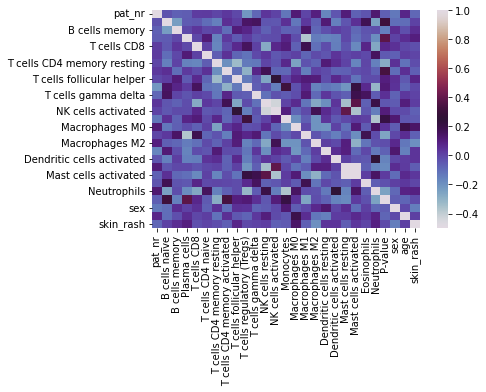

In [20]:
corr = new_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        cmap= "twilight")

## SVC Linear

In [68]:
from sklearn.svm import LinearSVC
model_linsvc = LinearSVC()

cv_results = cross_validate(model_linsvc, X_train2, y_train2, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.6316287878787878

In [71]:
cv_results = cross_validate(model_linsvc, X_train3, y_train3, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.6015151515151516

In [277]:
cv_results = cross_validate(model_linsvc, X_train4, y_train4, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5736666666666668

In [278]:
cv_results = cross_validate(model_linsvc, X_train6, y_train6, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5708333333333333

In [281]:
k_grid = [{"penalty": ["l1", "l2"],"loss":["hinge", "squared_hinge"],"C":[100, 10, 1.0, 0.1, 0.01],"multi_class":["ovr", "crammer_singer"]}]
 
search = GridSearchCV(model_linsvc, k_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 
search.fit(X_train3,y_train3);
search.best_params_

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/leacebulla/.pyenv/vers

{'C': 1.0, 'loss': 'squared_hinge', 'multi_class': 'ovr', 'penalty': 'l2'}

In [72]:
model_linsvc_best3 = LinearSVC(C=1.0, penalty="l2", multi_class='ovr', loss= 'squared_hinge')
model_linsvc_best3 = model_linsvc_best3.fit(X_train3,y_train3)

cv_results = cross_validate(model_linsvc_best3, X_train3, y_train3, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.6015151515151516

In [73]:
import joblib

In [74]:
joblib.dump(model_linsvc_best3,'best_model.joblib')

['best_model.joblib']

In [62]:
model_linsvc_best6 = LinearSVC(C=10, penalty="l2", multi_class='ovr', loss= 'squared_hinge')
model_linsvc_best6 = model_linsvc_best6.fit(X_train6,y_train6)

cv_results = cross_validate(model_linsvc_best6, X_train6, y_train6, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, in

0.5886363636363636

In [284]:
model_linsvc_best4 = LinearSVC(C=10, penalty="l1", multi_class='crammer_singer', loss= 'hinge')
model_linsvc_best4 = model_linsvc_best4.fit(X_train4,y_train4)

cv_results = cross_validate(model_linsvc_best4, X_train4, y_train4, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, in

0.5573333333333335

## SVC

In [286]:
from sklearn.svm import SVC
model_svc = SVC( kernel = 'rbf')

cv_results = cross_validate(model_svc, X_train2, y_train2, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.6077651515151515

In [287]:
cv_results = cross_validate(model_svc, X_train3, y_train3, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5768939393939394

In [288]:
cv_results = cross_validate(model_svc, X_train4, y_train4, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5976666666666667

In [289]:
k_grid = [{"C":[1000, 100, 10, 1.0, 0.1, 0.01], "kernel":["linear", "poly", "rbf", "sigmoid"], "gamma":["scale", "auto"], "decision_function_shape":["ovo", "ovr"]}]
 
search = GridSearchCV(model_svc, k_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 
search.fit(X_train4,y_train4);
search.best_params_

{'C': 1.0,
 'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'poly'}

In [291]:
model_svc_best3 = SVC(C=1000, decision_function_shape="ovo", gamma='auto', kernel= 'sigmoid')
model_svc_best3 = model_svc_best3.fit(X_train3,y_train3)

cv_results = cross_validate(model_svc_best3, X_train3, y_train3, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.6323863636363637

In [292]:
model_svc_best2 = SVC(C=0.1, decision_function_shape="ovo", gamma='scale', kernel= 'poly')
model_svc_best2 = model_svc_best2.fit(X_train2,y_train2)

cv_results = cross_validate(model_svc_best2, X_train2, y_train2, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5643939393939393

In [293]:
model_svc_best4 = SVC(C=6, decision_function_shape="ovo", gamma='scale', kernel= 'rbf')
model_svc_best4 = model_svc_best4.fit(X_train4,y_train4)

cv_results = cross_validate(model_svc_best4, X_train4, y_train4, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.6386666666666666

## Adaboost

In [44]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=1000)

cv_results = cross_validate(model_ada, X_train2, y_train2, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5825757575757576

In [45]:
model_ada = AdaBoostClassifier()

cv_results = cross_validate(model_ada, X_train3, y_train3, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5643939393939393

In [46]:
cv_results = cross_validate(model_ada, X_train4, y_train4, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5399999999999999

In [47]:
k_grid={"n_estimators":[50,100,500,1000,5000],'learning_rate': [0.1,0.25,0.5,0.75, 1, 2,4,5],"algorithm":["SAMME", "SAMME.R"]}
 
search = GridSearchCV(model_ada, k_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 
search.fit(X_train4,y_train4);
search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 1000}

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 6, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:656: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/ensemble/_weight_bo

In [298]:
model_ada_best2 = AdaBoostClassifier(algorithm="SAMME.R", learning_rate=2, n_estimators= 500)
model_ada_best2 = model_ada_best2.fit(X_train2,y_train2)

cv_results = cross_validate(model_ada_best2, X_train2, y_train2, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.5954545454545455

In [299]:
model_ada_best3 = AdaBoostClassifier(algorithm="SAMME", learning_rate=0.5, n_estimators= 500)
model_ada_best3 = model_ada_best3.fit(X_train3,y_train3)

cv_results = cross_validate(model_ada_best3, X_train3, y_train3, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.6140151515151515

In [300]:
model_ada_best4 = AdaBoostClassifier(algorithm="SAMME", learning_rate=0.5, n_estimators= 500)
model_ada_best4 = model_ada_best4.fit(X_train4,y_train4)

cv_results = cross_validate(model_ada_best4, X_train4, y_train4, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)
cv_results["test_accuracy"].mean()

0.525

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Se

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: T

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: T

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: T

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Se